<a href="https://colab.research.google.com/github/AnuragGorkar/CNN_using_different_DeepCNN_Models/blob/master/CNN_using_different_DeepCNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy

import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
print(device)

cuda:0


# DATASET, TRANSFORMS AND VISUALIZATION

In [0]:
transform_train = transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
                                     ])
transform_test = transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
                                     ])

In [0]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_train)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
num_classes = 10
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [0]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
6


In [0]:
def imshow(img, title):
  npimg = img.numpy() / 2 + 0.5
  plt.figure(figsize=(batch_size, 1))
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title =  [x.item() for x in labels])

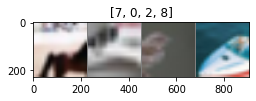

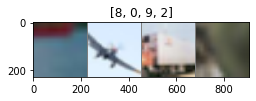

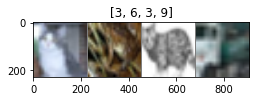

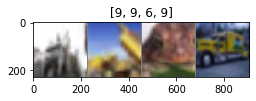

In [0]:
for i in range(4):
  show_batch_images(trainloader)

# VGG - 16 MODEL

In [0]:
from torchvision import models 

In [0]:
VGG = models.vgg16_bn()

In [0]:
print(VGG)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
print(VGG.features[0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [0]:
print(VGG.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [0]:
final_in_features = VGG.classifier[6].in_features
mod_classifier = list(VGG.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [0]:
VGG.classifier = nn.Sequential(*mod_classifier)
print(VGG)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# TRAIN MODEL OVER CIFAR10 DATASET

In [0]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

In [0]:
def evaluation(dataloader, model):
  total, correct = 0,0
  for data in dataloader:
    inputs ,labels = data
    inputs ,labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _,pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total 

In [0]:
VGG = VGG.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(VGG.parameters(), lr = 0.05)

# NON PRETRAINED MODEL

In [0]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs , labels = data
    inputs , labels = inputs.to(device),labels.to(device)

    opt.zero_grad()

    outputs = VGG(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(VGG.state_dict())
      print(f"MINIMUM LOSS :: {min_loss}")

    if i%100 == 0:
      print(f"ITERATION {i}/{n_iters}, LOSS :: {loss.item()}")

    del inputs, labels , outputs
    torch.cuda.empty_cache()

  loss_epoch_arr.append(loss.item())

    



MINIMUM LOSS :: 2.522862672805786
ITERATION 0/3125.0, LOSS :: 2.522862672805786
MINIMUM LOSS :: 2.404052495956421
MINIMUM LOSS :: 2.3795340061187744
MINIMUM LOSS :: 2.352278470993042
MINIMUM LOSS :: 2.1810684204101562
MINIMUM LOSS :: 2.0353732109069824
ITERATION 100/3125.0, LOSS :: 2.3221323490142822
MINIMUM LOSS :: 1.9735732078552246
ITERATION 200/3125.0, LOSS :: 2.520270824432373
ITERATION 300/3125.0, LOSS :: 2.415576934814453
ITERATION 400/3125.0, LOSS :: 2.3632354736328125
ITERATION 500/3125.0, LOSS :: 2.3688836097717285
ITERATION 600/3125.0, LOSS :: 2.241011381149292
ITERATION 700/3125.0, LOSS :: 2.334998846054077
ITERATION 800/3125.0, LOSS :: 2.119016170501709
MINIMUM LOSS :: 1.9350453615188599
ITERATION 900/3125.0, LOSS :: 2.378059148788452
ITERATION 1000/3125.0, LOSS :: 2.1844029426574707
ITERATION 1100/3125.0, LOSS :: 2.102489709854126
ITERATION 1200/3125.0, LOSS :: 2.2375402450561523
MINIMUM LOSS :: 1.8857274055480957
ITERATION 1300/3125.0, LOSS :: 2.1513874530792236
ITERATIO

In [0]:
VGG.load_state_dict(best_model)
print(evaluation(trainloader, VGG), evaluation(testloader, VGG))

22.96 23.11


# PRETRAINED CONVOLUTION LAYER MODEL 

In [0]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

In [0]:
VGG = models.vgg16_bn(pretrained = True)

In [0]:
for param in VGG.parameters():
  param.requires_grad = False

In [0]:
final_in_features = VGG.classifier[6].in_features
VGG.classifier[6] = nn.Linear(final_in_features, num_classes)

In [0]:
print(VGG)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
for param in VGG.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [0]:
VGG = VGG.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(VGG.parameters(), lr = 0.05)

In [0]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs , labels = data
    inputs , labels = inputs.to(device),labels.to(device)

    opt.zero_grad()

    outputs = VGG(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(VGG.state_dict())
      print(f"MINIMUM LOSS :: {min_loss}")

    if i%100 == 0:
      print(f"ITERATION {i}/{n_iters}, LOSS :: {loss.item()}")

    del inputs, labels , outputs
    torch.cuda.empty_cache()

  loss_epoch_arr.append(loss.item())

MINIMUM LOSS :: 2.258019208908081
ITERATION 0/3125.0, LOSS :: 2.258019208908081
MINIMUM LOSS :: 2.2178025245666504
MINIMUM LOSS :: 1.8491394519805908
MINIMUM LOSS :: 1.7778944969177246
MINIMUM LOSS :: 1.773681402206421
MINIMUM LOSS :: 1.7152243852615356
MINIMUM LOSS :: 1.3758102655410767
MINIMUM LOSS :: 1.2314752340316772
MINIMUM LOSS :: 0.9229108095169067
ITERATION 100/3125.0, LOSS :: 1.9326353073120117
ITERATION 200/3125.0, LOSS :: 1.7605043649673462
MINIMUM LOSS :: 0.7980120182037354
ITERATION 300/3125.0, LOSS :: 1.985589623451233
ITERATION 400/3125.0, LOSS :: 2.4858593940734863
ITERATION 500/3125.0, LOSS :: 2.0364863872528076
ITERATION 600/3125.0, LOSS :: 1.5056664943695068
ITERATION 700/3125.0, LOSS :: 2.1386260986328125
MINIMUM LOSS :: 0.6920402646064758
ITERATION 800/3125.0, LOSS :: 1.7211633920669556
ITERATION 900/3125.0, LOSS :: 1.415221095085144
ITERATION 1000/3125.0, LOSS :: 1.9820106029510498
MINIMUM LOSS :: 0.6763720512390137
ITERATION 1100/3125.0, LOSS :: 1.95040845870971

In [0]:
VGG.load_state_dict(best_model)
print(evaluation(trainloader, VGG), evaluation(testloader, VGG))

43.946 43.57


# RESNET - 18 MODEL 

In [0]:
RESNET = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
print(RESNET)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for param in RESNET.parameters():
  param.requires_grad = False 


In [0]:
in_features = RESNET.fc.in_features
RESNET.fc = nn.Linear(in_features, num_classes)

In [0]:
for param in RESNET.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [0]:
RESNET = RESNET.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(RESNET.parameters(), lr = 0.05)

MINIMUM LOSS :: 5.425957679748535
ITERATION 0/3125.0, LOSS :: 5.425957679748535
MINIMUM LOSS :: 4.25910758972168
MINIMUM LOSS :: 3.2517056465148926
MINIMUM LOSS :: 3.171635627746582
MINIMUM LOSS :: 2.798400640487671
MINIMUM LOSS :: 2.7357075214385986
MINIMUM LOSS :: 2.628434896469116
MINIMUM LOSS :: 2.2443904876708984
MINIMUM LOSS :: 1.5950708389282227
MINIMUM LOSS :: 1.5440877676010132
ITERATION 100/3125.0, LOSS :: 6.134796142578125
MINIMUM LOSS :: 1.3455588817596436
MINIMUM LOSS :: 1.1077932119369507
ITERATION 200/3125.0, LOSS :: 5.265435218811035
ITERATION 300/3125.0, LOSS :: 3.2878711223602295
ITERATION 400/3125.0, LOSS :: 5.934140205383301
MINIMUM LOSS :: 0.9300275444984436
MINIMUM LOSS :: 0.5796397924423218
ITERATION 500/3125.0, LOSS :: 5.966495513916016
ITERATION 600/3125.0, LOSS :: 3.469226360321045
ITERATION 700/3125.0, LOSS :: 5.554595947265625
ITERATION 800/3125.0, LOSS :: 4.392081260681152
ITERATION 900/3125.0, LOSS :: 5.4586076736450195
ITERATION 1000/3125.0, LOSS :: 6.490

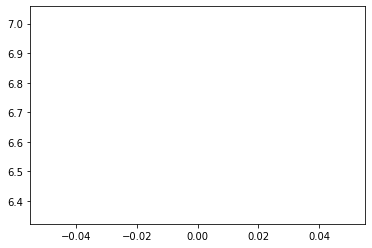

ITERATION 0/3125.0, LOSS :: 3.684354782104492
ITERATION 100/3125.0, LOSS :: 4.264715194702148
ITERATION 200/3125.0, LOSS :: 5.143548965454102
ITERATION 300/3125.0, LOSS :: 3.0360565185546875
ITERATION 400/3125.0, LOSS :: 4.016683101654053
ITERATION 500/3125.0, LOSS :: 3.8890275955200195
ITERATION 600/3125.0, LOSS :: 5.985651016235352
ITERATION 700/3125.0, LOSS :: 8.12802505493164
ITERATION 800/3125.0, LOSS :: 7.538496017456055
ITERATION 900/3125.0, LOSS :: 2.158301830291748
ITERATION 1000/3125.0, LOSS :: 5.070749282836914
ITERATION 1100/3125.0, LOSS :: 8.798279762268066
ITERATION 1200/3125.0, LOSS :: 12.537947654724121
ITERATION 1300/3125.0, LOSS :: 5.765451431274414
ITERATION 1400/3125.0, LOSS :: 2.135496139526367
ITERATION 1500/3125.0, LOSS :: 7.133388519287109
ITERATION 1600/3125.0, LOSS :: 3.9517664909362793
ITERATION 1700/3125.0, LOSS :: 8.211112976074219
MINIMUM LOSS :: 0.5637451410293579
ITERATION 1800/3125.0, LOSS :: 3.977231502532959
ITERATION 1900/3125.0, LOSS :: 4.5925512313

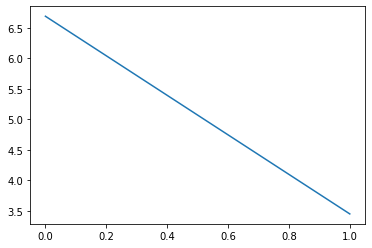

ITERATION 0/3125.0, LOSS :: 5.244724750518799
ITERATION 100/3125.0, LOSS :: 2.9461421966552734
ITERATION 200/3125.0, LOSS :: 5.916530132293701
ITERATION 300/3125.0, LOSS :: 5.2794294357299805
ITERATION 400/3125.0, LOSS :: 6.649587631225586
ITERATION 500/3125.0, LOSS :: 3.8936381340026855
ITERATION 600/3125.0, LOSS :: 7.893035411834717
ITERATION 700/3125.0, LOSS :: 5.752154350280762
MINIMUM LOSS :: 0.4313983619213104
ITERATION 800/3125.0, LOSS :: 3.4073355197906494
ITERATION 900/3125.0, LOSS :: 5.283031940460205
ITERATION 1000/3125.0, LOSS :: 3.931551456451416
ITERATION 1100/3125.0, LOSS :: 5.95114803314209
ITERATION 1200/3125.0, LOSS :: 6.918299198150635
ITERATION 1300/3125.0, LOSS :: 3.9770848751068115
ITERATION 1400/3125.0, LOSS :: 7.070964336395264
ITERATION 1500/3125.0, LOSS :: 5.744743347167969
ITERATION 1600/3125.0, LOSS :: 5.709494590759277
ITERATION 1700/3125.0, LOSS :: 2.926774024963379
ITERATION 1800/3125.0, LOSS :: 4.597794532775879
ITERATION 1900/3125.0, LOSS :: 7.186336517

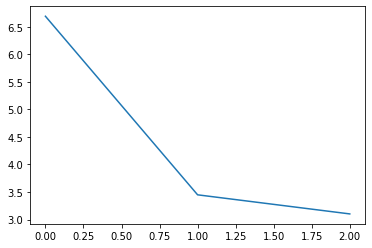

ITERATION 0/3125.0, LOSS :: 6.359292984008789
ITERATION 100/3125.0, LOSS :: 6.617465019226074
ITERATION 200/3125.0, LOSS :: 7.6582207679748535
ITERATION 300/3125.0, LOSS :: 5.7881903648376465
ITERATION 400/3125.0, LOSS :: 3.951618194580078
ITERATION 500/3125.0, LOSS :: 1.9581687450408936
ITERATION 600/3125.0, LOSS :: 3.288773536682129
ITERATION 700/3125.0, LOSS :: 7.920048236846924
ITERATION 800/3125.0, LOSS :: 5.402163505554199
ITERATION 900/3125.0, LOSS :: 7.415318965911865
ITERATION 1000/3125.0, LOSS :: 7.647205352783203
ITERATION 1100/3125.0, LOSS :: 8.330759048461914
ITERATION 1200/3125.0, LOSS :: 6.754742622375488
ITERATION 1300/3125.0, LOSS :: 4.193521499633789
ITERATION 1400/3125.0, LOSS :: 2.3842711448669434
ITERATION 1500/3125.0, LOSS :: 7.420166969299316
ITERATION 1600/3125.0, LOSS :: 3.8938021659851074
ITERATION 1700/3125.0, LOSS :: 5.935288429260254
ITERATION 1800/3125.0, LOSS :: 6.560218334197998
ITERATION 1900/3125.0, LOSS :: 3.4491937160491943
ITERATION 2000/3125.0, LOS

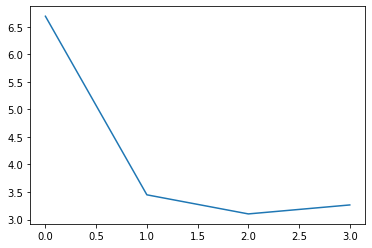

In [0]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):
    inputs , labels = data
    inputs , labels = inputs.to(device),labels.to(device)
    
    opt.zero_grad()
   

    outputs =RESNET(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()


    opt.step()
 

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(RESNET.state_dict())
      print(f"MINIMUM LOSS :: {min_loss}")

    if i%100 == 0:
      print(f"ITERATION {i}/{n_iters}, LOSS :: {loss.item()}")

    del inputs, labels , outputs
    torch.cuda.empty_cache()
  

  loss_epoch_arr.append(loss.item())
  print(f'EPOCH: {epoch}/4 , TEST ACC :: {evaluation(trainloader,RESNET)}, TRAIN ACC :: {evaluation(testloader, RESNET)}')

  plt.plot(loss_epoch_arr)
  plt.show()

In [0]:
RESNET.load_state_dict(best_model)
print(evaluation(trainloader, RESNET), evaluation(testloader, RESNET))

43.21 42.39


# INCEPTION V3 MODEL

In [0]:
INCEPTION = models.inception_v3(pretrained = True)

In [0]:
print(INCEPTION)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
for param in INCEPTION.parameters():
  param.requires_grad = False
  

In [0]:
aux_in_features = INCEPTION.AuxLogits.fc.in_features
INCEPTION.AuxLogits.fc = nn.Linear(aux_in_features, num_classes)

In [0]:
for param in INCEPTION.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [0]:
in_features = INCEPTION.fc.in_features
INCEPTION.fc = nn.Linear(in_features, num_classes)

In [0]:
for param in INCEPTION.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [0]:
transform_train_inception = transforms.Compose([
                                     transforms.RandomResizedCrop(299),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
                                     ])
transform_test_inception = transforms.Compose([
                                     transforms.RandomResizedCrop(299),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) 
                                     ])

In [0]:
trainset_inception = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_train_inception)
testset_inception = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform_test_inception)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader_inception = torch.utils.data.DataLoader(trainset_inception, batch_size = batch_size, shuffle = True)
testloader_inception = torch.utils.data.DataLoader(testset_inception, batch_size = batch_size, shuffle = False)

In [0]:
INCEPTION = INCEPTION.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(INCEPTION.parameters(), lr = 0.005)

In [0]:
def evaluation_inception(dataloader, model):
  total, correct = 0,0
  for data in dataloader:
    inputs ,labels = data
    inputs ,labels = inputs.to(device), labels.to(device)
    outputs, aux_outputs = model(inputs)
    _,pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

MINIMUM LOSS :: 1.7449171543121338
ITERATION 0/3125.0, LOSS :: 1.7449171543121338
MINIMUM LOSS :: 1.5528523921966553
MINIMUM LOSS :: 1.4560391902923584
MINIMUM LOSS :: 1.249593734741211
MINIMUM LOSS :: 1.1950281858444214
ITERATION 100/3125.0, LOSS :: 1.4809927940368652
ITERATION 200/3125.0, LOSS :: 2.3748362064361572
ITERATION 300/3125.0, LOSS :: 1.9972652196884155
MINIMUM LOSS :: 1.1839773654937744
ITERATION 400/3125.0, LOSS :: 1.3577899932861328
ITERATION 500/3125.0, LOSS :: 1.7149722576141357
ITERATION 600/3125.0, LOSS :: 1.3652762174606323
MINIMUM LOSS :: 1.0768824815750122
ITERATION 700/3125.0, LOSS :: 1.2661857604980469
ITERATION 800/3125.0, LOSS :: 1.7360343933105469
ITERATION 900/3125.0, LOSS :: 2.0789871215820312
ITERATION 1000/3125.0, LOSS :: 1.21806001663208
ITERATION 1100/3125.0, LOSS :: 2.1115472316741943
MINIMUM LOSS :: 1.0119569301605225
ITERATION 1200/3125.0, LOSS :: 2.405592679977417
ITERATION 1300/3125.0, LOSS :: 2.083474636077881
ITERATION 1400/3125.0, LOSS :: 2.0812

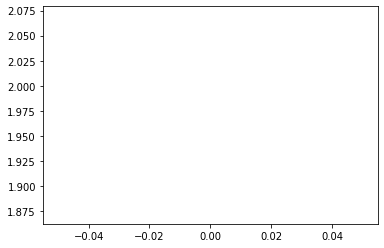

In [0]:
loss_epoch_arr = []
max_epochs = 1

min_loss = 1000

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader_inception, 0):
    inputs , labels = data
    inputs , labels = inputs.to(device),labels.to(device)
    
    opt.zero_grad()
   

    outputs, aux_outputs =INCEPTION(inputs)
    loss = loss_fn(outputs, labels) + 0.3 * loss_fn(aux_outputs, labels)
    loss.backward()


    opt.step()
 

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(INCEPTION.state_dict())
      print(f"MINIMUM LOSS :: {min_loss}")

    if i%100 == 0:
      print(f"ITERATION {i}/{n_iters}, LOSS :: {loss.item()}")

    del inputs, labels , outputs
    torch.cuda.empty_cache()
  

  loss_epoch_arr.append(loss.item())
  print(f'EPOCH: {epoch}/1 , TEST ACC :: {evaluation_inception(trainloader_inception,INCEPTION)}, TRAIN ACC :: {evaluation_inception(testloader_inception, INCEPTION)}')

  plt.plot(loss_epoch_arr)
  plt.show()

In [0]:
INCEPTION.load_state_dict(best_model)
print(evaluation_inception(trainloader_inception, INCEPTION), evaluation_inception(testloader_inception, INCEPTION))

48.008 48.14
